# LinearRegression算法基础
1. 描述：寻找一条“直线”，最大程度的拟合样本特征与样本标记之间的关系
    - 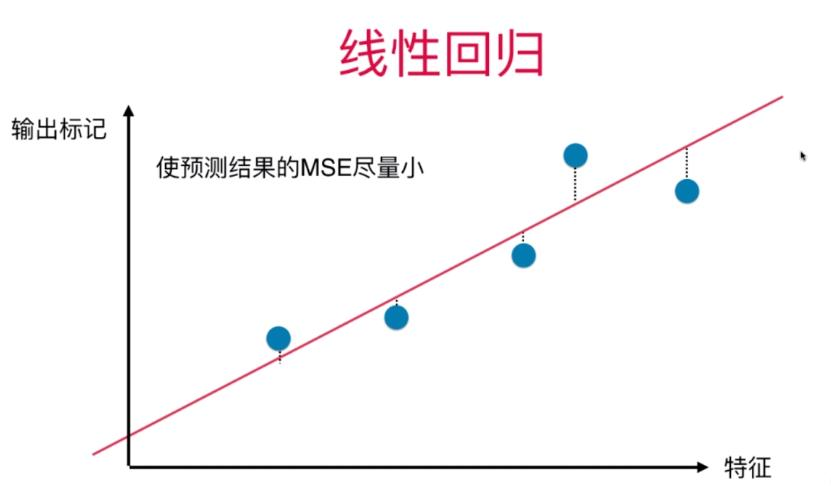
2. 适用范围
    - 数据需要具有线性关系（或者假设数据具有线性关系）
3. 求解方法：
    - 正规方程法：无需对数据归一化，求解慢
    - 梯度下降法：需要对数据归一化
3. 特点：
    - 典型的参数学习
    - 具有可解释性（白盒子，可学到知识）
4. 用途：
    - 回归问题

# 一元线性回归
1. 描述：训练出一元线性函数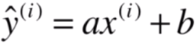 的系数a与截距b
2. 方法：最小二乘法
    - 分析：
        1. 直接累加差值可能为零
        2. 绝对值函数不可导
3. 目标：利用最小二乘法使得损失函数（效用函数）尽可能的小（大）
    - 损失函数：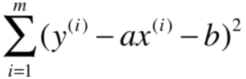
4. 一般解：
    - a：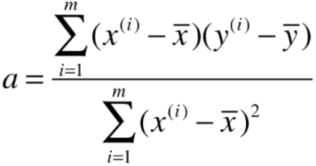
    - b：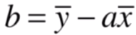
5. 向量化计算
    - 可向量化计算a，提高运算效率
    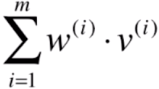
6. 衡量标准（评价函数和训练模型的目标函数可以不同）：
    - 均方误差MSE：存在量纲问题
    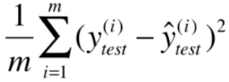
    - 均方根误差RMSE：解决量纲敏感问题，但受大误差数据的影响较大（sklearn未实现）
    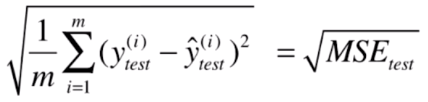
    - 平均绝对误差MAE：利用绝对差值来衡量，与RMSE量纲相同且均对应于标签y的量纲，一般会小于RMSE
    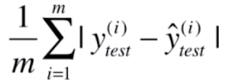
    - 可决系数R Squared：最常用来衡量模型的标准（LinearRegression中的默认衡量标准）
    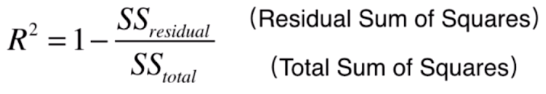
    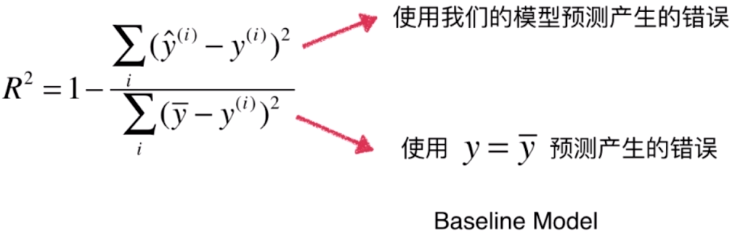
    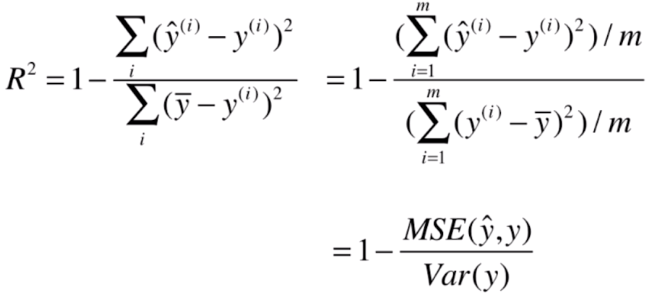
      - R^2 >= 0：越大越好，最大值为1
      - R^2 = 0：说明我们的模型等于基准模型（baseline model）
      - R^2 < 0：说明模型还不如基准模型，此时很有可能是因为数据没有线性关系

# 多元线性回归
1. 描述：训练出多元线性函数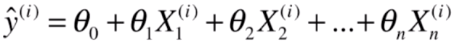中的n+1个参数
2. 流程：
    - 
    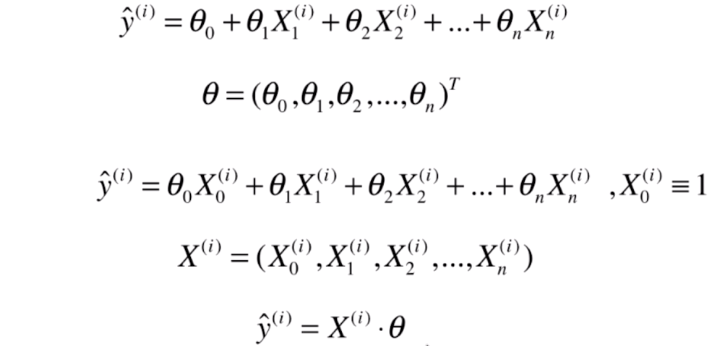
    - 
    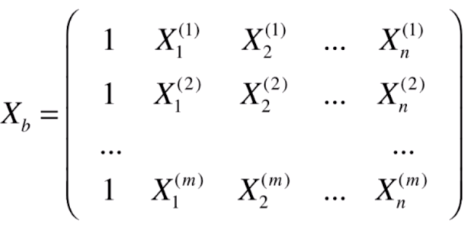
    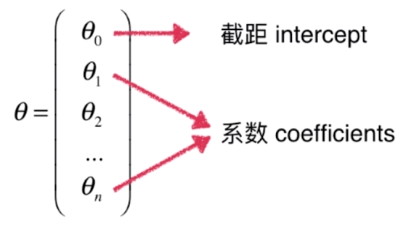
    - 
    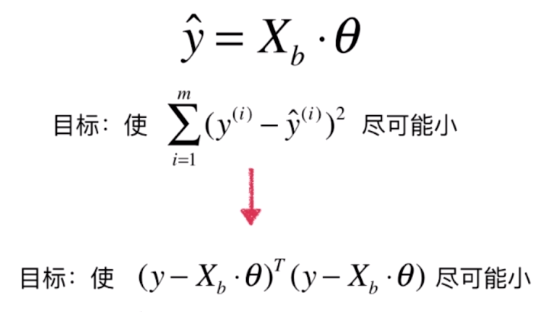
3. 多元线性回归正规方程解
    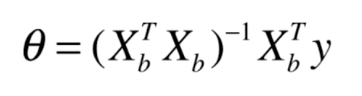
    - 优点：不需要对数据进行归一化处理
    - 缺点：时间复杂度高，为O(n^3)，优化后可为O(n^2.4)
4. 梯度下降法求解
    - 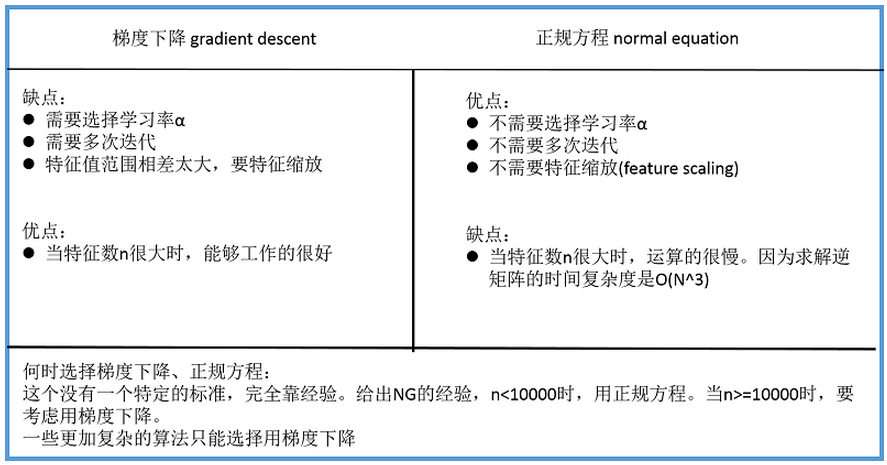

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [3]:
x = boston.data[:, 5]
x.shape

(506,)

In [5]:
y = boston.target
y.shape

(506,)

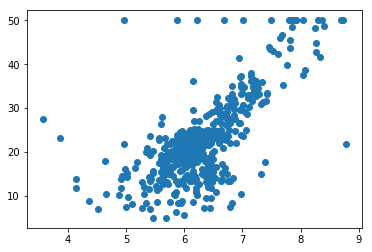

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
np.max(y)

50.0

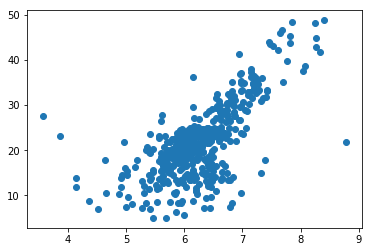

In [9]:
x = x[y < 50.0]  #通过散点图可以看出其中有上界异常值
y = y[y < 50.0]  #则可以去掉这些异常值，减小对算法的影响

plt.scatter(x, y)
plt.show()

# sklearn中的LinearRegression

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50.0]  #去除异常值
y = y[y < 50.0]  #同上

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lin_reg.coef_  #系数

array([ -1.14235739e-01,   3.12783163e-02,  -4.30926281e-02,
        -9.16425531e-02,  -1.09940036e+01,   3.49155727e+00,
        -1.40778005e-02,  -1.06270960e+00,   2.45307516e-01,
        -1.23179738e-02,  -8.80618320e-01,   8.43243544e-03,
        -3.99667727e-01])

In [27]:
lin_reg.intercept_  #截距

32.645660839652237

In [28]:
lin_reg.score(X_test, y_test)  #R^2值

0.80089161995190772

# sklearn中的MSE、MAE

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_predict = lin_reg.predict(X_test)
y_predict

array([ 18.06720061,  25.38842052,  12.88637643,  32.90835204,
        24.45397988,   2.30708724,  26.64169324,  31.60871402,
        14.04669932,  24.51624441,  14.80334503,  10.57965738,
        30.04628378,  16.39172915,  23.89512828,  25.39852591,
        18.8543776 ,  23.87690579,  28.78827968,  27.02022135,
        12.76509984,  27.00275212,  26.14846529,  22.86315467,
        20.89563046,  32.05888636,  14.79193377,  20.41277625,
        12.9193449 ,  30.15501477,  35.54985439,   5.26900466,
        13.14886325,  35.86197895,  16.03765405,  21.27787584,
        12.60030385,  29.36848015,  27.49792281,  24.00066354,
        14.13586558,  23.43977185,  11.17683708,  22.31129063,
        18.58987771,  16.41995801,  24.9447416 ,  33.28366331,
        19.11389151,  27.22704584,  18.07947567,  14.92767526,
        25.22396514,  16.21008419,  21.65562831,  16.22903694,
        24.0692956 ,  11.74802373,  27.94364395,  30.83194969,
        19.71563014,  24.79766319,  25.89834136,  12.26

In [32]:
mean_squared_error(y_test, y_predict)

13.01212785226107

In [33]:
mean_absolute_error(y_test, y_predict)

2.7858312264939546

In [36]:
LinearRegression?